In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/content/homeprices-2.csv')

In [5]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
df.shape

(6, 4)

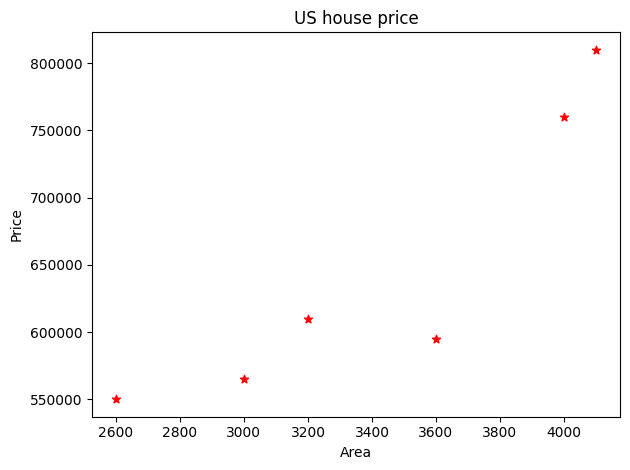

In [7]:
%matplotlib inline
plt.scatter(df.area, df.price, color= 'red', marker = '*' )
plt.xlabel('Area')
plt.ylabel ('Price')
plt.title('US house price')
plt.tight_layout()
plt.show()

In [8]:
x = df['area'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [9]:
reg= linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [10]:
reg.predict([[4000]])

array([[745930.56894889]])

In [11]:
reg.coef_

array([[167.30954677]])

In [12]:
reg.intercept_

array([76692.38187078])

In [15]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [16]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [17]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
reg= linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [19]:
reg.predict([[4000, 3, 18]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681568.48751237])

In [20]:
df = pd.read_csv('/content/hiring.csv')

In [29]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [25]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

In [26]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [27]:
experience_mapping = {'five': 5, 'two': 2, 'seven': 7, 'three': 3, 'ten': 10, 'eleven': 11}
df['experience'] = df['experience'].map(experience_mapping)


In [28]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [31]:
df.experience = df.experience.fillna(0)

In [32]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [35]:
 x= df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values
 y= df['salary($)'].values

In [36]:
reg= linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [38]:
reg.predict([[2,10, 10]])

array([63991.7318464])

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [45]:
mae = mean_absolute_error(reg.predict([[2,10, 10]]), [65000])
mse = mean_squared_error(reg.predict([[2,10, 10]]), [65000])
rmse = np.sqrt(mse)
r2 = r2_score(reg.predict([[2,10, 10]]), [65000])

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 1008.2681535994489
Mean Squared Error (MSE): 1016604.6695628418
Root Mean Squared Error (RMSE): 1008.2681535994489


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [48]:
pip install joblib

In [49]:
from joblib import dump, load

In [51]:
dump(reg, 'model_joblib.pkl')

['model_joblib.pkl']

In [52]:
loaded_model = load('model_joblib.pkl')

In [53]:
loaded_model.predict([[2,10, 10]])

array([63991.7318464])